# Covid-19 em Niterói (RJ)

O código a seguir foi desenvolvido para fazer uma análise dos dados sobre a Covid-19 em Niterói, disponibilizados pela Prefeitura diariamente em sua página no [Twitter](https://twitter.com/saudeniteroi?s=20). Para isso, todos os dados foram pegos da página da Secretaria de Saúde do município e colocados no arquivo `Dados_Covid_Niteroi.csv`

## Primeiro passo: chamando os pacotes

Vamos utilizar nesse código 4 pacotes:

* **Pandas**, um pacote magnífico para lidar com estrutura de dados em tabelas;
* **Numpy**, um pacote para operações matemáticas;
* **Scipy.stats**, módulo estatístico do pacote Scipy, para fazer análises estatísticas;
* **Matplotlib.pyplot**, pacote mais utilizado para gerar gráficos

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

## Segundo passo: lendo o arquivo csv

A leitura do arquivo será feita pelo pacote **Pandas**, utilizando a função `read_csv`. Atente para o separador utilizado (;), para o argumento `header = 0`, que diz que a primeira linha de cada coluna é o cabeçalho, e para os nomes das colunas dados. Caso você opte por usar outra base de dados (de outra cidade) ou atualizar o arquivo, deverá colocar mais uma entrada no vetor `names`.

In [7]:
df = pd.read_csv("Dados_COVID_Niteroi.csv", sep = ';', header = 0,
                 names = ['Date', 'Total cases', 'New cases', 'Total deaths', 'New deaths']) 

Vamos, agora, criar um vetor `dias` que receberá os dados da primeira coluna do `df` (dataframe), *convertendo-os* para o formato de data. Isso é importante pois não iremos conseguir manipular esses dados da maneira tradicional, pois eles não são *integers*. Para isso, usaremos o comando `pd.to_datetime`:

In [8]:
dias = pd.to_datetime(df['Date'])

## Terceiro passo: cálculos

Agora é o momento de fazermos alguns cálculos. Vamos por partes:

* Cálculo da taxa de letalidade da Covid-19 em Niterói

Esse cálculo é feito através da razão entre o número total de mortes atribuídas à COVID-19 e o número total de infectados. Como nossa planilha de dados é atualizada diariamente com o número total de casos na cidade, então basta pegarmos o *último* dado da coluna *Total cases* e o último dado da coluna *Total deaths*. Acessamos o último dado (posição -1) da respectiva coluna do DataFrame `df`:

In [20]:
Let = df['Total deaths'].iloc[-1] / df['Total cases'].iloc[-1] * 100.0

In [18]:
print('A taxa de letalidade é: %0.2f' % Let,'%')

A taxa de letalidade é: 4.04 %


* Cálculo do número de novos casos (acumulado dos últimos 7 dias)

Esse cálculo é feito a partir da *soma* dos novos casos dos últimos 7 dias. Geralmente, expressa-se esse dado para cada 100.000 habitantes. Para fazermos essa conta, precisamos então do **número de habitantes de Niterói**. De acordo com a estimativa do [IBGE](https://www.ibge.gov.br/cidades-e-estados/rj/niteroi.html) para o ano de 2019, Niterói tem aproximadamente **513.584 habitantes**. Acessar os últimos números de um DataFrame é fácil: basta utilizar o comando `.tail()`, colocando dentro do parêntesis um número inteiro que representa quantos números você quer acessar. No nosso caso, queremos *somar* os 7 últimos dados da coluna *New cases* Portanto, temos, usaremos `.tail(7).sum()`:

In [21]:
Pop = 513584

In [22]:
NewCases_100k = df['New cases'].tail(7).sum() / (Pop / 10**5)

In [26]:
print('O número de novos casos em Niterói é de %0.2f' % NewCases_100k,'para cada 100 mil habitantes')

O número de novos casos em Niterói é de 99.50 para cada 100 mil habitantes


* Cálculo do número de novas mortes (acumulado dos últimos 7 dias)

O cálculo é feito exatamente como mostrado para o número de novos casos. Agora, buscaremos somar os 7 últimos dados da coluna *New deaths* do DataFrame. Assim:

In [27]:
NewDeaths_100k = df['New deaths'].tail(7).sum() / (Pop / 10**5)

In [28]:
print('O número de novas mortes em Niterói é de %0.2f' % NewDeaths_100k, 'para cada 100 mil habitantes')

O número de novas mortes em Niterói é de 3.31 para cada 100 mil habitantes


***
**Cálculos estatísticos**
***

Agora, vamos fazer alguns cálculos estatísticos. De acordo com a literatura disponível, a fase crítica da pandemia se caacteriza por um crescimento *exponencial* do número de casos. Estima-se que a doença possa apresentar certo controle quando esse crescimento torna-se *linear*. Então, o que vamos fazer agora é ver como foi esse crescimento de casos, mês a mês, na cidade de Niterói, e fazer uma *regressão linear*, ou seja, descobrir se os dados se comportam mais ou menos como uma linha reta.


* Separar os dados para a regressão


A primeira coisa a se fazer é *separar os dados* do DataFrame (`df`) por *mês*. Lembra que nós criamos um novo vetor coluna `dias` só com os dados das datas, convertendo os valores para o formato *data* para que pudéssemos melhor manipulá-lo? Então, é ele que vamos acessar agora. 

O pacote **Pandas** permite que a gente acesse dados com certas *condições* no DataFrame. No nosso caso, queremos acessar, nesse momento, *somente os dados relativos ao mês de Abril*. Formatar esses dados para o formato de data nos ajuda, pois o **Pandas** tem um comando de acesso à entradas formatadas especificamente para datas: o `.dt`.

Como queremos todos os dados do mês de Abril, vamos pedir para o **Pandas** localizar (`loc`) pra gente todos os dados do *mês 4*, ou seja, `dt.month == 4`. Vamos jogar esses dados localizados num vetor que chamaremos de `abril`:

In [29]:
abril = dias.loc[dias.dt.month == 4]

In [30]:
abril

0    2020-04-01
1    2020-04-02
2    2020-04-03
3    2020-04-04
4    2020-04-05
5    2020-04-06
6    2020-04-07
7    2020-04-08
8    2020-04-09
9    2020-04-10
10   2020-04-11
11   2020-04-12
12   2020-04-13
13   2020-04-14
14   2020-04-15
15   2020-04-16
16   2020-04-17
17   2020-04-18
18   2020-04-19
19   2020-04-20
20   2020-04-21
21   2020-04-22
22   2020-04-23
23   2020-04-24
24   2020-04-25
25   2020-04-26
26   2020-04-27
27   2020-04-28
28   2020-04-29
29   2020-04-30
Name: Date, dtype: datetime64[ns]

Agora é só fazer o mesmo com os meses de Maio (05) e Junho (06):

In [31]:
maio = dias.loc[dias.dt.month == 5]

In [32]:
junho = dias.loc[dias.dt.month == 6]

Agora, precisamos fazer o mesmo procedimento, mas para os casos totais por dia em cada mês. Bom, o procedimento é o mesmo e temos até algumas formas diferentes de fazê-lo. Aqui, a lógica que usaremos é a seguinte: nós vamos localizar no nosso DataFrame principal `df.loc`, a partir da condição de que o valor para o mês no vetor `dias` é 4 (Abril), os valores correspondentes à essa condição na coluna *Total cases*. Ou seja, vamos localizar valores dentro do DataFrame `df` que respeitem um critério prévio: os índices das entradas no vetor `dia` cujo mês é Abril (4).

In [33]:
abril_totalcases = df.loc[dias.dt.month == 4, 'Total cases']

In [34]:
abril_totalcases

0      62
1      63
2      65
3      87
4      92
5     106
6     107
7     117
8     130
9     147
10    167
11    177
12    185
13    194
14    198
15    212
16    232
17    238
18    242
19    247
20    253
21    258
22    264
23    278
24    288
25    346
26    405
27    409
28    431
29    443
Name: Total cases, dtype: int64

Faremos o mesmo agora para os meses de Maio e Junho:

In [35]:
maio_totalcases = df.loc[dias.dt.month == 5, 'Total cases']

In [36]:
junho_totalcases = df.loc[dias.dt.month == 6, 'Total cases']

* Preparar os dados para a regressão



Chegou a hora de prepararmos os dados para a regressão. Lembra que nós convertemos os dados de `df['Dates']` para formato de data para manipulá-los na hora de plotar? Então, nesse momento específico da regressão, não podemos trabalhar com eles nesse formato. Precisamos, na verdade, que eles estejam no formato numérico (`int64` ou `float64`).

Como nós criamos novos vetores para pegar esses dados 'convertidos', podemos fazer a conversão tranquilamente sem perder informação para posteriori. Para isso, vamos jogar esses vetores em *arrays*, fazendo a conversão para `float`:

In [37]:
abril = np.array(abril, dtype = float)

In [38]:
maio = np.array(maio, dtype = float)

In [39]:
junho = np.array(junho, dtype = float)

* Fazendo a regressão

Agora, finalmente, faremos a regressão linear. Se você tem dúvidas conceituais sobre esse procedimento, recomendo a leitura [aqui](https://en.wikipedia.org/wiki/Linear_regression) e em livros sobre estatística básica, especialmente os que tratam de modelos.

Para fazer a regressão, usaremos o comando `ss.linregress`. Esse comando nos fornece como output *cinco* parâmetros: o coeficiente angular (`slope`) da reta, o coeficiente linear (`intercept`) da reta, o valor de R-quadrado (`r_value`), o p-valor (`p-value`) e o erro-padrão (`std_err`). Fazendo então a regressão entre os dados do eixo X (datas dos meses) e do eixo Y (número de casos totais para cada mês), teremos:

In [40]:
slope, intercept, r_value, p_value, std_err = ss.linregress(abril, abril_totalcases)

In [41]:
slope_2, intercept_2, r_value_2, p_value_2, std_err_2 = ss.linregress(maio, maio_totalcases)

In [42]:
slope_3, intercept_3, r_value_3, p_value_3, std_err_3 = ss.linregress(junho, junho_totalcases)

Finalmente, construímos um modelo linear na forma **y = slope * x + intercept**:

In [43]:
y_abril = slope*abril + intercept

In [44]:
y_maio = slope_2 * maio + intercept_2

In [45]:
y_junho = slope_3 * junho + intercept_3

## Quarto passo: plotando os gráficos

Chegou a hora de plotar os gráficos. Dividiremos essa etapa da seguinte maneira:

***
**Gráfico 01: Número total de casos e mortes**
***

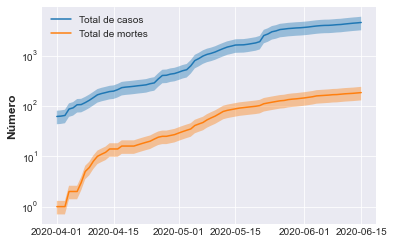

In [47]:
plt.style.use('seaborn-darkgrid') # Um estilo bonitinho pros gráficos
plt.figure(0)
plt.plot(dias, df['Total cases'], label = 'Total de casos') #Plota no eixo X os dias, no eixo Y o número total de casos
plt.plot(dias, df['Total deaths'], label = 'Total de mortes') #Plota no eixo X os dias, no eixo Y o número total de mortes
plt.yscale("log") #Muda a escala do eixo y para logarítmica.
plt.legend(loc = 'best') #Posição da legenda: melhor que o Python encontra.
plt.ylabel('Número', fontweight = 'bold', fontsize = 12) #Coloca legenda do eixo Y
plt.fill_between(dias, 0.7*df['Total cases'], 1.3*df['Total cases'], alpha = 0.4) #Coloca a 'sombra' na linha
plt.fill_between(dias, 0.7*df['Total deaths'], 1.3*df['Total deaths'], alpha = 0.4) #Coloca a 'sombra' na linha
plt.show()

***
**Gráficos 02, 03 e 04: casos totais por mês e ajuste linear**
***

Text(1.5909696e+18, 4501, '$R^2$ =  0.994')

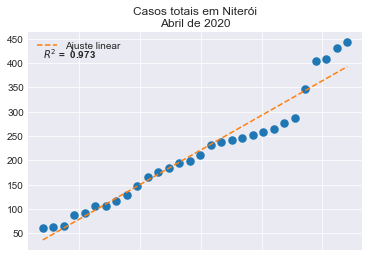

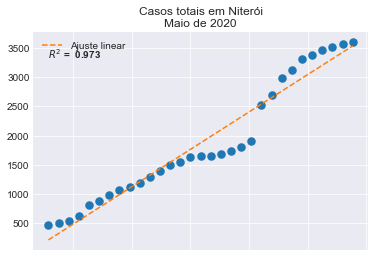

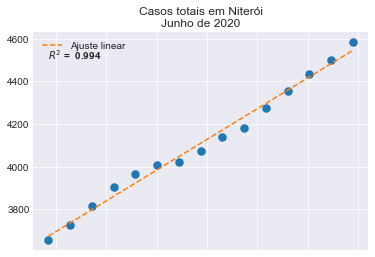

In [48]:
plt.figure(1)
plt.plot(abril, abril_totalcases, 'o', markersize = 7, markeredgewidth = 1.5)
plt.plot(abril, y_abril, '--', linewidth = 1.5, label = 'Ajuste linear')
plt.legend(loc = 'best')
plt.title('Casos totais em Niterói' "\n" 'Abril de 2020')
plt.gca().axes.get_xaxis().set_ticklabels([])
plt.text(abril[0], abril_totalcases.iloc[-3], '$R^2$ =  %0.3f' % r_value, fontweight = 'bold')

plt.figure(2)
plt.plot(maio, maio_totalcases, 'o', markersize = 7, markeredgewidth = 1.5)
plt.plot(maio, y_maio, '--', linewidth = 1.5, label = 'Ajuste linear')
plt.legend(loc = 'best')
plt.title('Casos totais em Niterói' "\n" 'Maio de 2020')
plt.gca().axes.get_xaxis().set_ticklabels([]) #Apaga o eixo X
plt.text(maio[0], maio_totalcases.iloc[-6], '$R^2$ =  %0.3f' % r_value_2, fontweight = 'bold') #Insere R-quadrado no gráfico

plt.figure(3)
plt.plot(junho, junho_totalcases, 'o', markersize = 7, markeredgewidth = 1.5)
plt.plot(junho, y_junho, '--', linewidth = 1.5, label = 'Ajuste linear')
plt.legend(loc = 'best')
plt.title('Casos totais em Niterói' "\n" 'Junho de 2020')
plt.gca().axes.get_xaxis().set_ticklabels([])
plt.text(junho[0], junho_totalcases.iloc[-2], '$R^2$ =  %0.3f' % r_value_3, fontweight = 'bold')

Perceberam uma tendência interessante nesses gráficos? O crescimento dos novos casos em Niterói, nos meses de Abril e Maio, foi pouco parecido com uma reta (R-quadrado = 0,97). Em Junho, o ajuste a um modelo linear melhorou consideravelmente (R-quadrado = 0,99), o que pode indicar uma estabilização da doença na cidade.

***
**Gráfico 05: novos casos diários e novas mortes diárias**
***

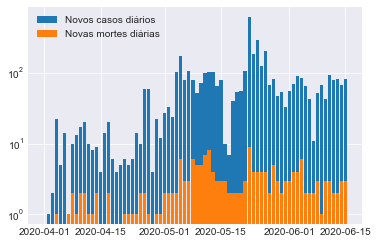

In [49]:
plt.figure(4)
plt.bar(dias, df['New cases'], label = 'Novos casos diários')
plt.bar(dias, df['New deaths'], label = 'Novas mortes diárias')
plt.legend(loc = 'best')
plt.yscale("log")